In [152]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

plt.style.use('seaborn') #стиль отрисовки seaborn
%matplotlib inline

C:\Users\kot\AppData\Local\Temp\ipykernel_43344\598800705.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #стиль отрисовки seaborn


In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [12]:
data = pd.read_excel('data/data_ford_price.xlsx') 
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


None

In [5]:
y = data['price']
X = data.drop(columns='price')

In [7]:
lr = linear_model.LinearRegression()
lr.fit(X,y)


ValueError: could not convert string to float: 'clean'

In [11]:

lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
 
lb.fit(education)
 
print('категории:', lb.classes_)
 
lb.transform(['нет', 'MSc', 'среднее'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

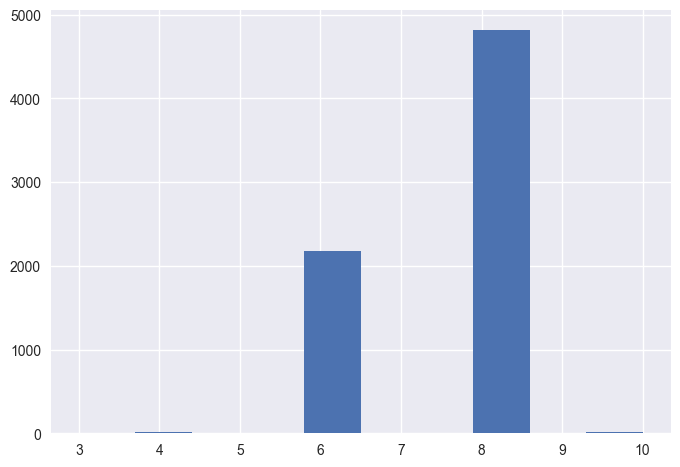

In [16]:
data['cylinders'].hist();


<AxesSubplot: >

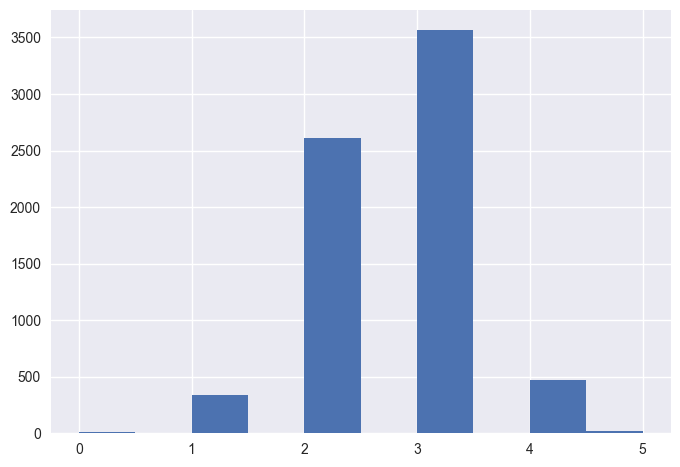

In [15]:
data['condition'].hist()

In [19]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
for column in columns_to_change:
    print('Число уникальных значений признака {} {}: '.format(column, data[column].nunique()))

Число уникальных значений признака cylinders 6: 
Число уникальных значений признака title_status 5: 
Число уникальных значений признака transmission 3: 
Число уникальных значений признака drive 3: 
Число уникальных значений признака size 4: 


Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — fit_transform(). В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода get_feature_names() получим список новых названий колонок:

In [23]:
one_hot_encoder = OneHotEncoder()

# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()

# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


In [26]:
print(data.shape)
print(data_onehot.shape)

(7017, 12)
(7017, 23)


 Задание 3.7
1 point possible (graded)

Какая форма (количество строк и столбцов) будет у нашего датасета о стоимости автомобилей после кодировки номинальных признаков однократным методом?

In [28]:
data_onehot = pd.DataFrame(data_onehot, index=data.index, columns=column_names)
display(data_onehot)

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,title_status_clean,title_status_lien,title_status_missing,title_status_rebuilt,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_nan,size_compact,size_full-size,size_mid-size,size_sub-compact,size_nan
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7013,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7014,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7015,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
data_new = pd.concat([data_onehot, data], axis=1)
data_new = data_new.drop(columns=columns_to_change)
print(data_new.shape)

(7017, 30)


Символ ~ (тильда) означает, что мы выбираем все строки датасета data, где не выполняется условие data['weather'].isna(), то есть где нет пропусков в столбце 'weather'.

In [35]:
display(data['weather'].isna().value_counts())

display(data[~data['weather'].isna()])

False    6837
True      180
Name: weather, dtype: int64

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [38]:
display(data['size'].isna().value_counts(normalize=True))

display(data[~data['size'].isna()])

print(np.round(len(data[~data['size'].isna()])/len(data),2))

False    0.777113
True     0.222887
Name: size, dtype: float64

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


0.78


In [51]:
data = pd.read_excel('data/data_ford_price.xlsx') 
y = data['price']
X = data.drop(columns='price')


In [52]:
X = X.dropna()
y = y.iloc[X.index]

In [53]:
print(X.shape[0])
print(y.shape[0])

5202
5202


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.2)
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

In [58]:
one_hot_encoder = OneHotEncoder()
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

columns = one_hot_encoder.get_feature_names_out(columns_to_change)
print(columns[:10])

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt']


In [59]:
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

Таблица X_train содержит рандомные индексы, так как мы разделили выборку на train и test. Если просто соединить X_train и X_train_onehot_df, то получится таблица, полная пропусков по причине несовпадения индексов.

In [72]:
X_train = X_train.reset_index().drop(['index'], axis=1)
X_test = X_test.reset_index().drop(['index'], axis=1)

y_train = y_train.reset_index().drop(['index'], axis=1)
y_test = y_test.reset_index().drop(['index'], axis=1)


In [73]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

In [74]:
display(X_train_new[X_train_new['weather'].isna()])

,year,condition,odometer,lat,long,weather,cylinders_3,cylinders_4,cylinders_5,cylinders_6,...,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact


In [75]:
lr_model = linear_model.LinearRegression()

lr_model.fit(X_train_new, y_train)

y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)

In [76]:
print("Teain R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Teain R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Teain R^2: 0.647
Teain R^2: 0.693


# Предобработка: заполнение пропусков

function, which code the data

In [88]:
def encode_cat_features(columns_to_change, X_train, X_test, y_train):
  one_hot_encoder = OneHotEncoder()
  X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
  X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()
  
  columns = one_hot_encoder.get_feature_names_out(columns_to_change)
  
  X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
  X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

  X_train = X_train.reset_index().drop(['index'], axis = 1)
  X_test = X_test.reset_index().drop(['index'], axis = 1)
  y_train = y_train.reset_index().drop(['index'], axis = 1)

  X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
  X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
  
  X_train_new = X_train_new.drop(columns=columns_to_change)
  X_test_new = X_test_new.drop(columns=columns_to_change)
  


  return X_train_new, X_test_new

→ Теперь давайте попробуем заполнить пропуски константными значениями и обучить модель заново. Плюс такого подхода состоит в том, что мы предотвращаем потерю данных, которая происходит при удалении строк или столбцов. Основной минус — в снижении разброса (разнообразия) признаков.

In [128]:
data = pd.read_excel('data/data_ford_price.xlsx') 

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [129]:
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_test['weather']),0))

Для простоты воспользуемся заполнением наиболее частым значением категориальных признаков. Для этого сначала определим их в наших признаках, использовав комбинацию методов value_counts() и head():

In [130]:
print(X_train['drive'].value_counts(True))

4wd    0.738406
rwd    0.248344
fwd    0.013250
Name: drive, dtype: float64


In [131]:
print(X_train['size'].value_counts(True))

full-size      0.841164
mid-size       0.155627
compact        0.002980
sub-compact    0.000229
Name: size, dtype: float64


In [132]:
X_train['drive'] = X_train['drive'].fillna('4wd')
X_train['size'] = X_train['size'].fillna('full-size')

X_test['drive'] = X_test['drive'].fillna('4wd')
X_test['size'] = X_test['size'].fillna('full-size')

In [133]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

In [134]:
lr_model = linear_model.LinearRegression()

lr_model.fit(X_train_new, y_train)

y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)

print("Teain R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Teain R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Teain R^2: 0.649
Teain R^2: 0.465


# Предсказание пропусков с помощью ML

Приведённые методы обработки отсутствующих значений не учитывают корреляционную связь признака, содержащего пропуски, с остальными. Признаки, не имеющие NaN, можно использовать для прогнозирования пропущенных значений. Строится модель регрессии или классификации в зависимости от характера (категорийного или непрерывного) признака, имеющего пропущенное значение.

In [135]:
data = x.copy()
test_data = data[data['weather'].isnull()]

display(test_data)

data.dropna(inplace=True)

y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)

categorial_cols = ['cylinders', 'title_status', 'transmission']

X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_new, y_train)

y_test_predict_weather = lr_model.predict(X_test_new)

display(y_test_predict_weather)
display(y_test_predict_weather.shape)

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
4,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
18,2015,3,6,73300,clean,automatic,4wd,full-size,49.184885,-122.801111,NaN
21,2015,3,6,88500,clean,automatic,4wd,full-size,50.039078,-125.271885,NaN
53,2018,4,8,10500,clean,automatic,4wd,NaN,49.172179,-123.076057,NaN
116,2015,4,8,26903,clean,automatic,4wd,NaN,50.045346,-125.269028,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6865,2014,3,6,86250,clean,automatic,4wd,full-size,49.184885,-122.801111,NaN
6921,2018,4,6,1073,clean,automatic,4wd,NaN,49.204598,-123.139205,NaN
6937,2006,3,8,131000,clean,automatic,4wd,NaN,-2.508807,-105.886335,NaN
6963,2012,4,8,157887,clean,automatic,4wd,full-size,49.737705,-125.000103,NaN


array([ 40.91435555,  40.7637233 ,  39.74866152,  41.2755305 ,
        40.31791932,  41.10796547,  41.15337846,  39.94866488,
        41.10796547,  40.7217165 ,  40.18904454,  91.62094167,
        41.12549856,  41.33052316,  39.66827354,  40.91435555,
        40.77287826,  40.84208674,  41.10796547,  41.02118034,
        40.31791932,  41.30309209,  40.77645269,  40.75842615,
        40.61605044,  40.79031628,  40.7701239 ,  39.78723017,
        41.27231621,  39.77492057,  40.7637233 ,  40.7701239 ,
        41.10796547,  39.68313064,  40.12277414,  39.7873657 ,
        41.07798631,  41.06812063,  40.7637233 ,  40.90194049,
        41.10796547,  70.85737739,  30.44339508,  40.76125291,
        39.77492057,  41.12549856,  39.74864816,  40.72219488,
        40.97162064,  40.7448585 ,  39.71065847,  39.78779447,
        39.77492057,  40.15945849,  41.12549856,  40.7902779 ,
        39.65555168,  41.10796547,  40.76125291,  40.15619215,
        40.79031628,  41.10796547,  40.7902779 ,  40.72

(180,)


Задание 4.5 (на самопроверку)

Вставьте найденную замену на место пропусков в столбце weather. Используйте тот же метод для заполнения пропусков в size. Обратите внимание на то, какой тип модели нужен (классификация или регрессия) в зависимости от типа признака.

Попробуйте выполнить задание самостоятельно. При затруднениях вы можете посмотреть решение в ноутбуке в начале юнита.


In [136]:
print(len(x))
display(test_data.index)
display(test_data.index[:len(x)])

7017


Int64Index([   4,   18,   21,   53,  116,  162,  180,  191,  260,  261,
            ...
            6589, 6698, 6719, 6824, 6845, 6865, 6921, 6937, 6963, 6973],
           dtype='int64', length=180)

Int64Index([   4,   18,   21,   53,  116,  162,  180,  191,  260,  261,
            ...
            6589, 6698, 6719, 6824, 6845, 6865, 6921, 6937, 6963, 6973],
           dtype='int64', length=180)

In [137]:
for i, val in enumerate(test_data.index):
    x['weather'].loc[val] = y_test_predict_weather[i]
        

C:\Users\kot\AppData\Local\Temp\ipykernel_43344\1819083306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['weather'].loc[val] = y_test_predict_weather[i]


In [138]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          5453 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


<AxesSubplot: >

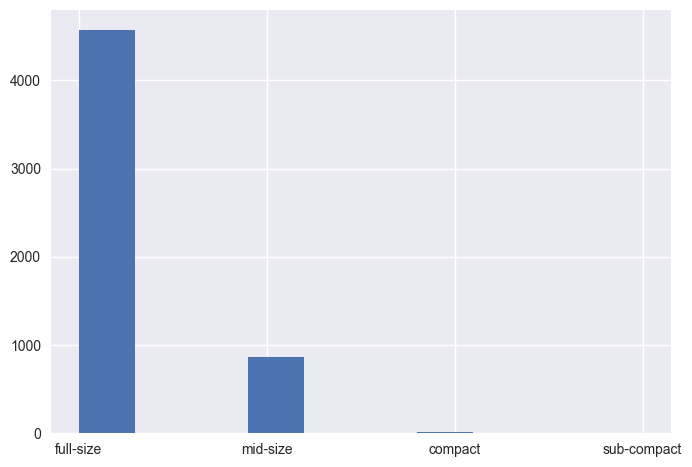

In [139]:
x['size'].hist()

Данный признак является категориальным. Следовательно, понадобится классификатор для заполения пропусков в нем.

In [140]:
data = x.copy()
test_data = data[data['size'].isnull()]

display(test_data)

data.dropna(inplace=True)

y_train = data['size']
X_train = data.drop(['size','drive'], axis=1)
X_test = test_data.drop(['size','drive'], axis=1)

X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)


,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
4,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,40.914356
8,2011,2,6,77000,clean,automatic,rwd,NaN,33.698900,-84.745400,59.000000
12,2001,1,8,275000,clean,automatic,4wd,NaN,44.549400,-90.611200,45.000000
25,2016,3,8,25814,clean,automatic,4wd,NaN,43.852883,-88.855927,45.000000
33,2005,2,8,148000,clean,automatic,4wd,NaN,61.153500,-149.828900,29.000000
...,...,...,...,...,...,...,...,...,...,...,...
6983,2004,1,8,179945,clean,automatic,rwd,NaN,40.010899,-74.131575,52.000000
6987,2014,3,6,91383,clean,automatic,4wd,NaN,43.223605,-76.802231,53.000000
6991,2010,2,8,101215,clean,automatic,rwd,NaN,43.098946,-76.097853,53.000000
7007,2014,3,8,40000,clean,automatic,4wd,NaN,36.562900,-82.653200,59.000000


In [142]:
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train_new, y_train)

y_test_predict_size = lr_model.predict(X_test_new)

display(y_test_predict_size)
display(y_test_predict_size.shape)

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['full-size', 'full-size', 'full-size', ..., 'full-size',
       'full-size', 'full-size'], dtype=object)

(1564,)

In [143]:
for i, val in enumerate(test_data.index):
    x['size'].loc[val] = y_test_predict_size[i]

C:\Users\kot\AppData\Local\Temp\ipykernel_43344\1630766309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['size'].loc[val] = y_test_predict_size[i]


In [276]:
data = pd.read_excel('data/data_ford_price.xlsx') 

data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

x.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [277]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)

print('MAE: %.3f' % mae)

MAE: 4682.957


Настало время обработки выбросов.

1
Первый алгоритм, который мы применим, — Isolation Forest, или iForest. Это алгоритм обнаружения аномалий на основе дерева.

Данный метод стремится изолировать аномалии, которые немногочисленны и различаются по пространству признаков.

Библиотека scikit-learn предоставляет реализацию Isolation Forest в классе IsolationForest.

Одним из основных гиперпараметров модели является contamination («загрязнение»), который используется для оценки количества выбросов в наборе данных. Его значение находится в диапазоне от 0.0 до 0.5 и по умолчанию равно 0.1.

In [292]:
from  sklearn.ensemble import IsolationForest

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
y_predicted = iso.fit_predict(X_train)

# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train_iso, y_train_iso = X_train[mask], y_train[mask]

print(X_train_iso.shape, y_train_iso.shape)

model = linear_model.LinearRegression()
model.fit(X_train_iso, y_train_iso)
y_predicted = model.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)

print('MAE: %.3f' % mae)

c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(4306, 6) (4306,)
MAE: 4447.823


2
Следующий метод — Local Outlier Factor, или LOF. Это метод, который пытается использовать идею ближайших соседей для обнаружения выбросов.

Каждому примеру присваивается оценка того, насколько он изолирован от его локальных соседей. Примеры, которые наиболее отдалены от соседей, скорее всего, будут являться выбросами.

Библиотека scikit-learn обеспечивает реализацию этого подхода в классе LocalOutlierFactor.

In [293]:
from sklearn.neighbors import LocalOutlierFactor

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)


lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

X_train_lof, y_train_lof = X_train[mask], y_train[mask]
print(X_train_iso.shape, y_train_iso.shape)

model = linear_model.LinearRegression()
model.fit(X_train_lof, y_train_lof)
y_predicted = model.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)

print('MAE: %.3f' % mae)


(4306, 6) (4306,)
MAE: 4447.823


Напоследок рассмотрим Minimum Covariance Determinant, или MCD.

Если входные переменные имеют гауссово распределение, то для обнаружения выбросов можно использовать простые статистические методы.

Например, если набор данных имеет две входные переменные и обе они являются гауссовыми, то пространство признаков образует многомерную гауссовскую зависимость, и знание этого распределения можно использовать для определения значений, далёких от распределения.

Этот подход можно обобщить, определив гиперсферу (эллипсоид), которая покрывает нормальные данные, а данные, выходящие за пределы этой формы, считаются выбросами. Эффективная реализация этого метода для многомерных данных известна как детерминант минимальной ковариации (MCD).

In [294]:
from sklearn.covariance import EllipticEnvelope

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train_ee, y_train_ee = X_train[mask], y_train[mask]
 
print(X_train_ee.shape, y_train_ee.shape)
 
model = linear_model.LinearRegression()
model.fit(X_train_ee, y_train_ee)
y_predicted = model.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)

print('MAE: %.3f' % mae)

(4737, 6) (4737,)
MAE: 4391.986


###  5. Масштабирование признаков

Давайте посмотрим, как StandardScaler, MinMaxScaler и RobustScaler справятся с нашими данными. Для наглядности будем использовать три столбца.

In [301]:
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('data/data_ford_price.xlsx') 

data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)

data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

scaler = StandardScaler()
data_scaled[col_names] = scaler.fit_transform(x.values)

display(data_scaled)



,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [304]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 3.041


 Задание 5.2
1 point possible (graded)
Отмасштабируйте признак price с помощью RobustScaler.

В качестве ответа запишите результат выполнения кода data['price'][1]. Ответ округлите до двух знаков после точки-разделителя.

In [307]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_scaled['price'] = scaler.fit_transform(x.values)

display(data_scaled['price'][1])

0.1894603976017671

### 6. Трансформации распределений признаков

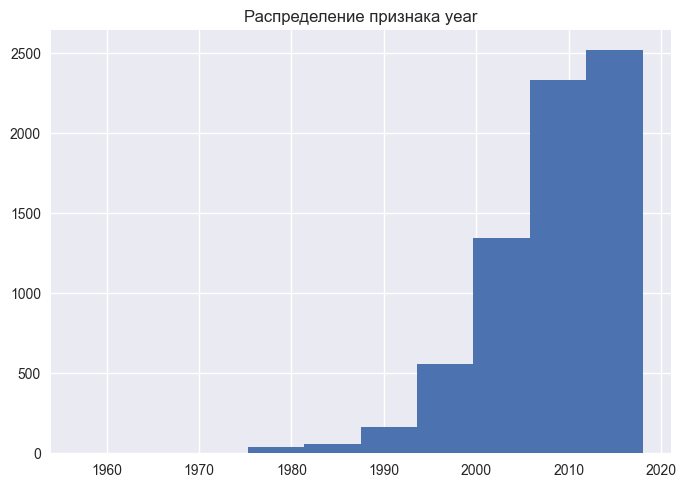

In [321]:
data = pd.read_excel('data/data_ford_price.xlsx') 

plt.hist(data.year)
plt.title('Распределение признака year');

,year
0,2016
1,2009
2,2002
3,2000
4,2010
...,...
7012,2015
7013,2005
7014,2006
7015,2011


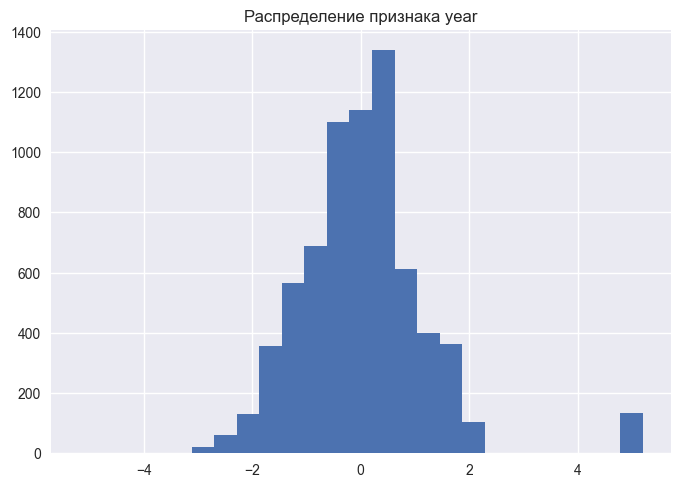

In [322]:
from sklearn.preprocessing import QuantileTransformer
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)

#data_for_transform = data['year'].values.reshape((len(data), 1))
data_for_transform = data[['year']]
display(data_for_transform)

quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)


plt.hist(data_transformed, bins=25)
plt.title('Распределение признака year');

 Задание 6.1
1 point possible (graded)
Преобразуйте распределение признаков condition и cylinders в равномерное. Какое значение признака condition получится у нулевого объекта? Ответ округлите до второго знака после точки-разделителя.

0.9639639639639639

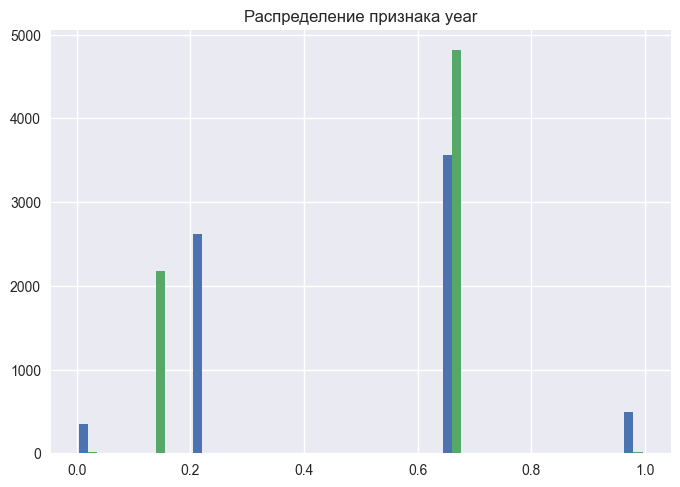

In [328]:

data_for_transform = data[['condition', 'cylinders']]

quantile = QuantileTransformer(output_distribution='uniform')
data_transformed = quantile.fit_transform(data_for_transform)

display(data_transformed[0][0],)

plt.hist(data_transformed, bins=25)
plt.title('Распределение признака year');

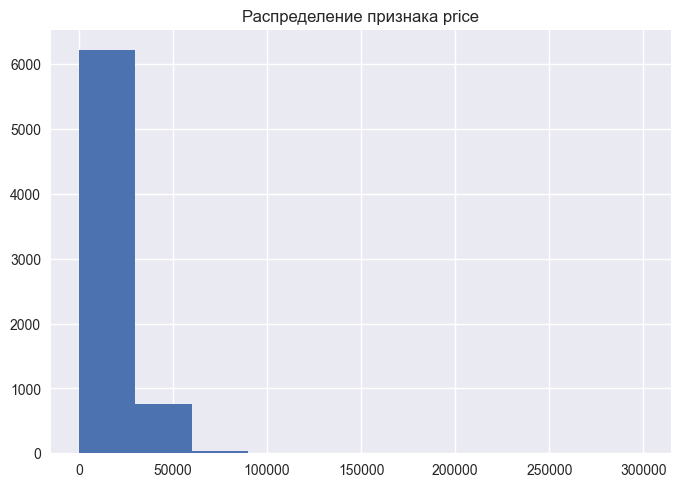

In [329]:
plt.hist(data.price)
plt.title('Распределение признака price');

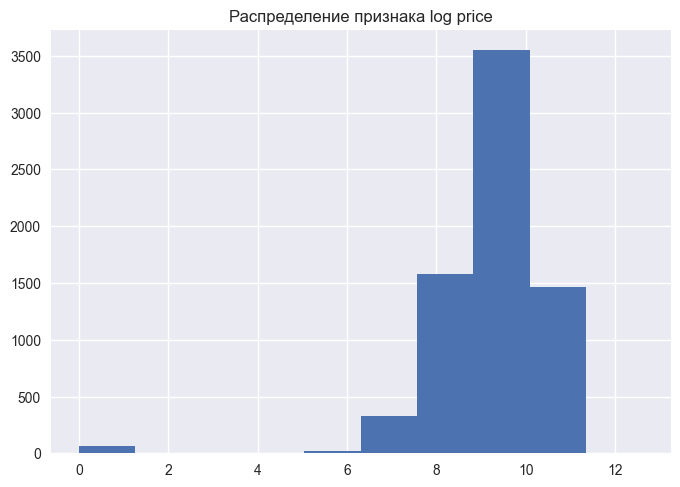

In [330]:
log_price = np.log(data['price'])
plt.hist(log_price)
plt.title('Распределение признака log price');

In [335]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis=1)
display(price_data)
display(price_data.describe())


,price,transformed_price
0,43900,10.689670
1,15490,9.647950
2,2495,7.822044
3,1300,7.170120
4,13865,9.537123
...,...,...
7012,22500,10.021271
7013,5975,8.695339
7014,9999,9.210240
7015,10900,9.296518


,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


 Задание 6.3
1 point possible (graded)
Какое значение признака transformed_price имеет последний объект? Ответ округлите до одного знака после точки-разделителя.

In [340]:
print(log_price[-1::])

7016    9.798127
Name: price, dtype: float64


ower Transformer Scaler

Как и другие скейлеры, с которыми вы уже познакомились, Power Transformer также изменяет распределение переменной, то есть делает его более гауссовым (нормальным).

Однако чтобы использовать все изученные раннее методы трансформации и скейлинга, необходимо сначала понять исходное распределение признака, а затем уже делать выбор. Power Transformer фактически автоматизирует принятие этого решения, вводя параметр, называемый lambda. Он принимает решение об обобщённом степенном преобразовании, находя наилучшее значение

 и используя один из следующих параметрических методов:

        Преобразование Бокса-Кокса, которое работает для положительных значений признака.
        Преобразование Йео-Джонсона, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.

В нашем случае мы будем использовать преобразование Бокса-Кокса, так как все значения положительны.

In [350]:
from sklearn.preprocessing import PowerTransformer

box_cox = PowerTransformer(method='box-cox')

data_box_cox = box_cox.fit_transform(data[['price','year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])



c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\kot\OneDrive\Documents\GitHub\SkillFactory-DTS\venv\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


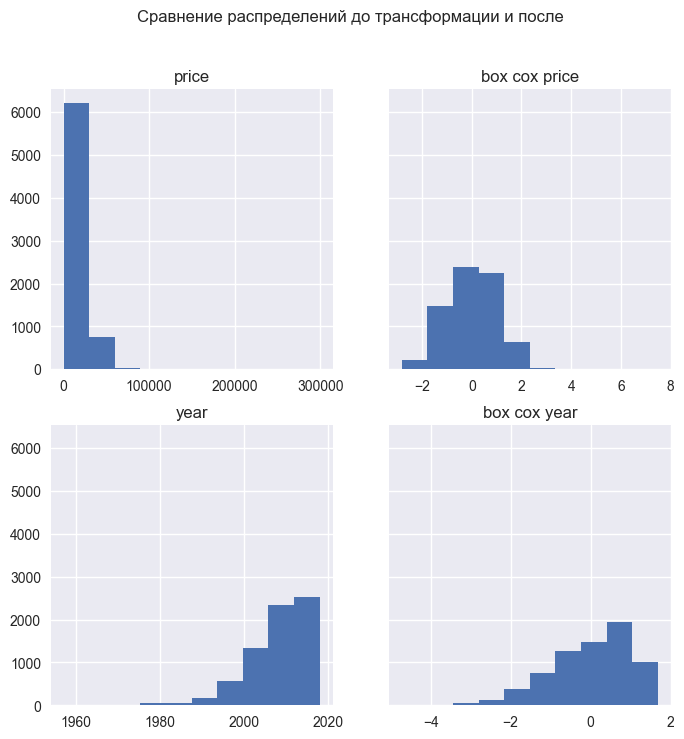

In [351]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()